<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#fff" size=14px>
                    <b>Laptop Price Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Problem Statement

This dataset is created for the prediction on Laptop Prices. The dataset contains various features that are important during the application for the selling the Laptop. The predicted output gives the predicted price of the laptop.

## (A) Dataset Overview

In [321]:
import pandas as pd

df = pd.read_csv("/content/sample_data/Laptop_Dataset.csv")
df.head()

,No.,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No.               1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


## (B) Exploratory Data Analysis

In [323]:
df.shape

(1303, 12)

In [324]:
df.dtypes

,0
No.,int64
Company,object
TypeName,object
Inches,float64
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object
OpSys,object


In [325]:
df.describe()

,No.,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [326]:
df.isnull().sum()


,0
No.,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [327]:
for col in df.select_dtypes('object').columns:
    print(col, ":", df[col].nunique(), "unique values")

Company : 19 unique values
TypeName : 6 unique values
ScreenResolution : 40 unique values
Cpu : 118 unique values
Ram : 9 unique values
Memory : 39 unique values
Gpu : 110 unique values
OpSys : 9 unique values
Weight : 179 unique values


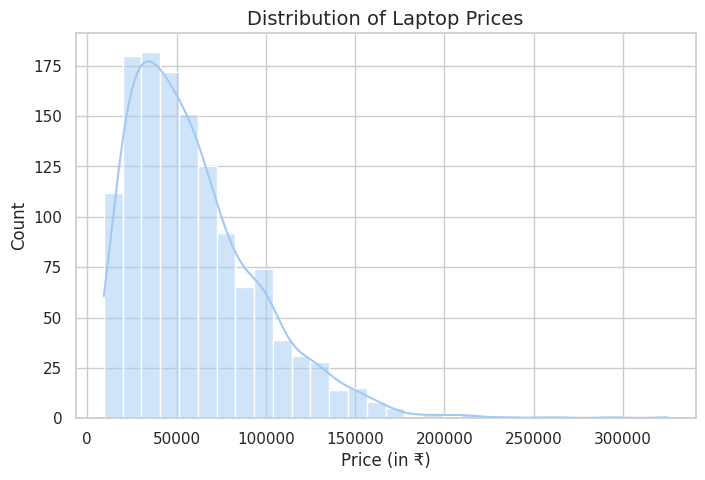

In [328]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title("Distribution of Laptop Prices", fontsize=14)
plt.xlabel("Price (in ₹)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

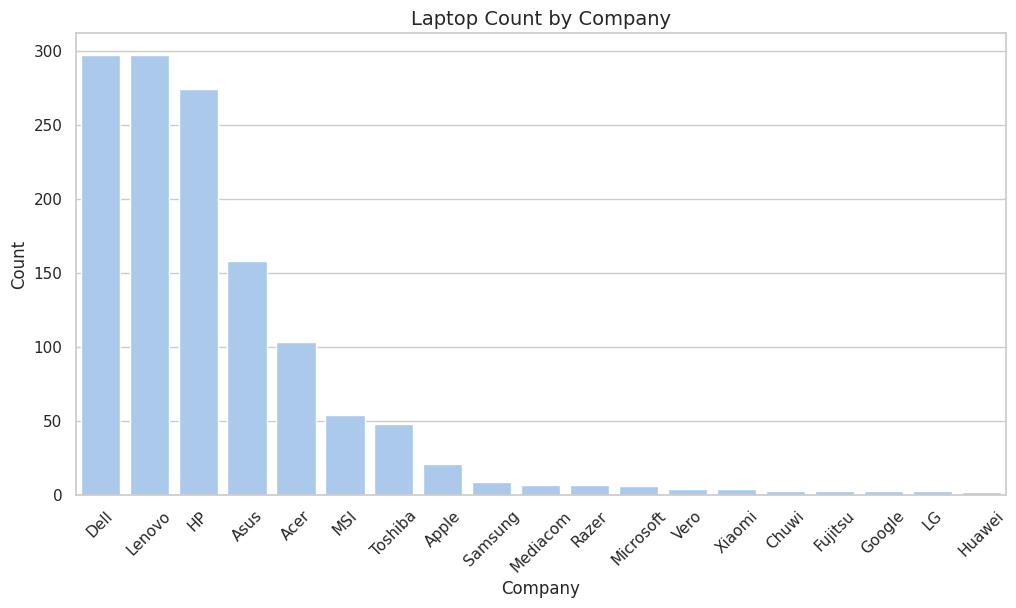

In [329]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Company', data=df, order=df['Company'].value_counts().index)
plt.title("Laptop Count by Company", fontsize=14)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

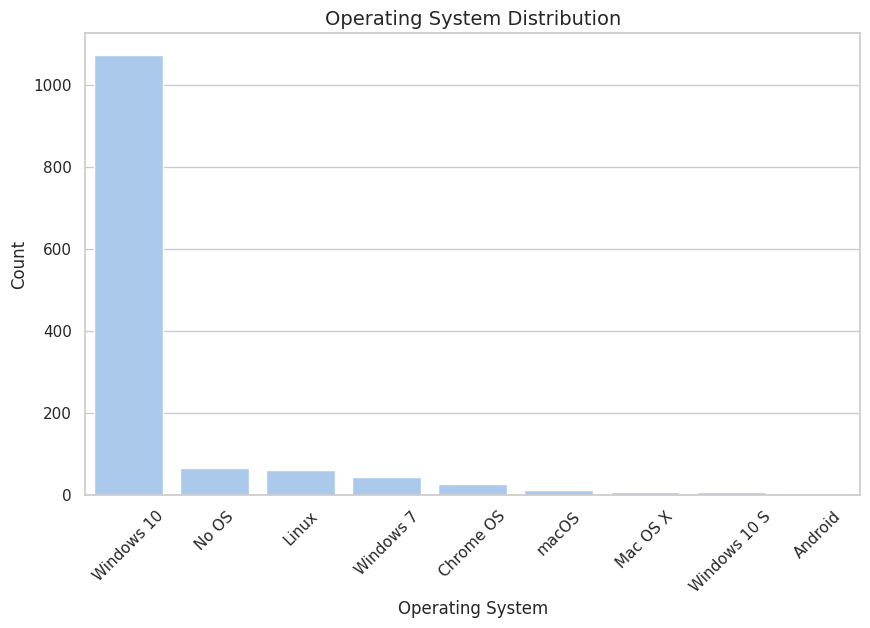

In [330]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OpSys', data=df, order=df['OpSys'].value_counts().index)
plt.title("Operating System Distribution", fontsize=14)
plt.xlabel("Operating System", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

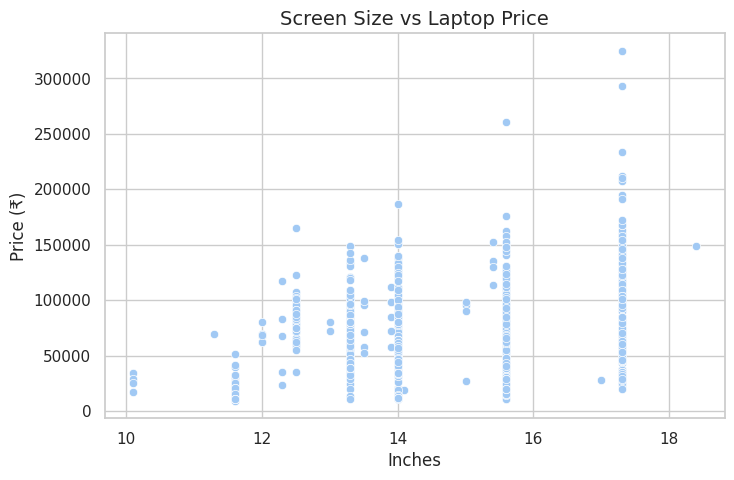

In [331]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Inches', y='Price', data=df)
plt.title("Screen Size vs Laptop Price", fontsize=14)
plt.xlabel("Inches", fontsize=12)
plt.ylabel("Price (₹)", fontsize=12)
plt.show()

## (C) Data Preprocessing

In [332]:
df.drop('No.', axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [333]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [334]:
df['Resolution_X'] = df['ScreenResolution'].str.extract(r'(\d+)x').astype(float)
df['Resolution_Y'] = df['ScreenResolution'].str.extract(r'x(\d+)').astype(float)
df.drop('ScreenResolution', axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution_X,Resolution_Y
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560.0,1600.0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440.0,900.0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920.0,1080.0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880.0,1800.0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560.0,1600.0


In [335]:
import pandas as pd

# Convert all text to uppercase and remove spaces
df['Memory'] = df['Memory'].str.upper().str.replace(' ', '')

import re

# Initialize columns
df['SSD'] = 0
df['HDD'] = 0

for i, row in df.iterrows():
    mem_str = row['Memory']

    # Extract SSD size
    ssd_match = re.search(r'(\d+)(GB|TB)SSD', mem_str)
    if ssd_match:
        size = int(ssd_match.group(1))
        if ssd_match.group(2) == 'TB':
            size *= 1024  # Convert TB to GB
        df.at[i, 'SSD'] = size

    # Extract HDD size
    hdd_match = re.search(r'(\d+)(GB|TB)HDD', mem_str)
    if hdd_match:
        size = int(hdd_match.group(1))
        if hdd_match.group(2) == 'TB':
            size *= 1024
        df.at[i, 'HDD'] = size

df.drop('Memory', axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Resolution_X,Resolution_Y,SSD,HDD
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560.0,1600.0,128,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440.0,900.0,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,1920.0,1080.0,256,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880.0,1800.0,512,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560.0,1600.0,256,0


In [336]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Resolution_X,Resolution_Y,SSD,HDD
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560.0,1600.0,128,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440.0,900.0,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,1920.0,1080.0,256,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880.0,1800.0,512,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560.0,1600.0,256,0


In [337]:
## Extracting Clock Speed
df['ClockSpeed'] = df['Cpu'].apply(lambda x:x.split(' ')[-1]).str.replace("GHz","").astype(float)
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Resolution_X,Resolution_Y,SSD,HDD,ClockSpeed
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560.0,1600.0,128,0,2.3
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440.0,900.0,0,0,1.8
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,1920.0,1080.0,256,0,2.5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880.0,1800.0,512,0,2.7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560.0,1600.0,256,0,3.1


In [338]:
## Extracting CPU Type
df['CPUType'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

## Dividing The CPUTypes Into Differnt Categories Based On Their Frequency
def divide_into_category(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
df['CPUType'] = df['CPUType'].apply(divide_into_category)
df.drop('Cpu', axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Resolution_X,Resolution_Y,SSD,HDD,ClockSpeed,CPUType
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560.0,1600.0,128,0,2.3,Intel Core i5
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440.0,900.0,0,0,1.8,Intel Core i5
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,1920.0,1080.0,256,0,2.5,Intel Core i5
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880.0,1800.0,512,0,2.7,Intel Core i7
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560.0,1600.0,256,0,3.1,Intel Core i5


In [339]:
df['Gpu_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])
df.drop('Gpu', axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Resolution_X,Resolution_Y,SSD,HDD,ClockSpeed,CPUType,Gpu_Brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,2560.0,1600.0,128,0,2.3,Intel Core i5,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,1440.0,900.0,0,0,1.8,Intel Core i5,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,1920.0,1080.0,256,0,2.5,Intel Core i5,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,2880.0,1800.0,512,0,2.7,Intel Core i7,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,2560.0,1600.0,256,0,3.1,Intel Core i5,Intel


In [341]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for col in ['Company', 'TypeName', 'CPUType', 'Gpu_Brand', 'OpSys']:
    df[col] = label_enc.fit_transform(df[col])
df.head()


,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Resolution_X,Resolution_Y,SSD,HDD,ClockSpeed,CPUType,Gpu_Brand
0,1,4,13.3,8,8,1.37,71378.6832,2560.0,1600.0,128,0,2.3,2,2
1,1,4,13.3,8,8,1.34,47895.5232,1440.0,900.0,0,0,1.8,2,2
2,7,3,15.6,8,4,1.86,30636.0000,1920.0,1080.0,256,0,2.5,2,2
3,1,4,15.4,16,8,1.83,135195.3360,2880.0,1800.0,512,0,2.7,3,0
4,1,4,13.3,8,8,1.37,96095.8080,2560.0,1600.0,256,0,3.1,2,2


In [342]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [343]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [344]:
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (1042, 13)
Testing shape: (261, 13)


## (D) Machine Learning Algorithm Implementation & Model Evaluation


In [345]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model1 = LinearRegression()

#Fit the model to the training data
model1.fit(X_train, y_train)

# Predict on the testing data
predictions1 = model1.predict(X_test)

print(predictions1)

[ 65336.20083374  63091.76866734  34173.68392991  64874.67070787
  48509.34328472  48123.56224361  44961.9016805   31216.06882241
  70522.85702603  13198.28208795 129045.44216775  35729.88673185
  58218.06068052  33033.79990337  91727.20354327  51189.11892509
  90421.03904158  57880.33666553  61982.47258341  92338.95058032
 104032.20227033  39564.62216285  67317.31078244  49823.368579
  53385.72289453  46586.02563369  31942.60106636  30257.5489362
  60686.45965365  62244.03049476  33542.4911688   73632.92328166
  80747.20511936  54935.07979704  65737.71486608  46540.77508463
  57888.82965762  46937.37667059  66175.79110636   7674.50906163
  98374.69654062  46626.50785361  38518.06636992 103381.70419066
  34427.52286271  64989.51753235 104854.82030948  24185.40203188
  63786.16734878  72194.14684354  64738.23378362  27283.00617109
  52079.45593908  44592.66923743  43301.05551705  78152.93198235
  24185.40203188  50914.9157837   49274.41301731  64874.67070787
  90435.82529158  59931.5890

In [366]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# R2 Score (how well the model explains the variance)
r2_lr = r2_score(y_test, predictions1)

# Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, predictions1)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions1)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display Results
print("🔹 Linear Regression Model Evaluation 🔹")
print(f"R² Score: {r2_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


🔹 Linear Regression Model Evaluation 🔹
R² Score: 0.7297
Mean Absolute Error (MAE): 13931.66
Mean Squared Error (MSE): 389717482.05
Root Mean Squared Error (RMSE): 19741.26


In [367]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define bins and labels
bins = [0, 10000, 20000, float('inf')]
labels = ['Low', 'Medium', 'High']

# Convert continuous price values to categories
y_test_cat = pd.cut(y_test, bins=bins, labels=labels)
y_pred_lr_cat = pd.cut(predictions1, bins=bins, labels=labels)

# Convert categories to strings to avoid comparison error
y_test_cat = y_test_cat.astype(str)
y_pred_lr_cat = y_pred_lr_cat.astype(str)

# Evaluate classification metrics for Linear Regression
print("\n🔹 Linear Regression Classification Metrics 🔹")
print("Accuracy:", accuracy_score(y_test_cat, y_pred_lr_cat))
print("Precision:", precision_score(y_test_cat, y_pred_lr_cat, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test_cat, y_pred_lr_cat, average='weighted', zero_division=0))
print("F1-Score:", f1_score(y_test_cat, y_pred_lr_cat, average='weighted', zero_division=0))



🔹 Linear Regression Classification Metrics 🔹
Accuracy: 0.9233716475095786
Precision: 0.932066370533193
Recall: 0.9233716475095786
F1-Score: 0.9107832830876071


In [368]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

# Predictions
Predictions2 = model2.predict(X_test)
print(Predictions2)

[ 75698.6256      72691.47576     29935.60776     52487.80632
  81095.420736    82018.11312     39714.890688    26379.853296
  80185.0661352   19844.546256   124226.305344    41420.20056
  94707.0648      40334.814144    98852.64522857  56313.688608
  72487.168272    50997.980304    37604.656368   107181.2448
 144025.405536    38445.526656    60480.760032    15956.05143051
  55263.806208    54440.603568    33820.91856     28548.40968
  70346.09016     52602.182496    24895.690944    92000.451456
  80354.759472    56514.6985968   65263.327344    37944.747936
  37051.450128    25634.68632     66224.546496    12762.58464
  99231.740928    35067.908544    31389.480432   142927.867728
  31550.279472    76700.257632   105139.864224    12073.7808
  48992.537088    75443.078736    91364.618592    25527.458988
  41366.06808     68933.125872    31239.252144    64317.321408
  12073.7808      50450.40576     64546.228272    52487.80632
  90169.622784    48686.954976    20164.14456     39141.224928

In [369]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# R2 Score (how well the model explains the variance)
r2_rf = r2_score(y_test, Predictions2)

# Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, Predictions2)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, Predictions2)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display Results
print("🔹 Linear Regression Model Evaluation 🔹")
print(f"R² Score: {r2_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


🔹 Linear Regression Model Evaluation 🔹
R² Score: 0.8280
Mean Absolute Error (MAE): 9938.75
Mean Squared Error (MSE): 247939918.41
Root Mean Squared Error (RMSE): 15746.11


In [370]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define bins and labels
bins = [0, 10000, 20000, float('inf')]
labels = ['Low', 'Medium', 'High']

# Convert continuous price values to categories
y_test_cat = pd.cut(y_test, bins=bins, labels=labels)
y_pred_lr_cat = pd.cut(Predictions2, bins=bins, labels=labels)

# Convert categories to strings to avoid comparison error
y_test_cat = y_test_cat.astype(str)
y_pred_lr_cat = y_pred_lr_cat.astype(str)

# Evaluate classification metrics for Linear Regression
print("\n🔹 Linear Regression Classification Metrics 🔹")
print("Accuracy:", accuracy_score(y_test_cat, y_pred_lr_cat))
print("Precision:", precision_score(y_test_cat, y_pred_lr_cat, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test_cat, y_pred_lr_cat, average='weighted', zero_division=0))
print("F1-Score:", f1_score(y_test_cat, y_pred_lr_cat, average='weighted', zero_division=0))


🔹 Linear Regression Classification Metrics 🔹
Accuracy: 0.9578544061302682
Precision: 0.9557670418089491
Recall: 0.9578544061302682
F1-Score: 0.9564439253253383


<h2>Comparison Table</h2>

<table border="1" style="border-collapse: collapse; text-align: center;">
  <tr>
    <th>Model</th>
    <th>Accuracy Percentage</th>
    <th>Mean Absolute Error</th>
    <th>R2 Score</th>
    <th>F1 Score</th>
  </tr>
  <tr>
    <td>Liunear Regression</td>
    <td>92.33%</td>
    <td>1.39</td>
    <td>0.72</td>
    <td>0.91</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>95.78%</td>
    <td>0.99</td>
    <td>0.82</td>
    <td>0.95</td>
  </tr>
</table>


## (E) Visualization

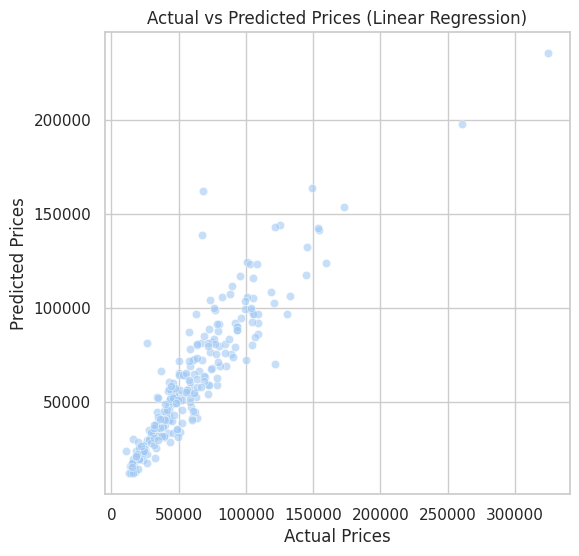

In [371]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=Predictions2, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()


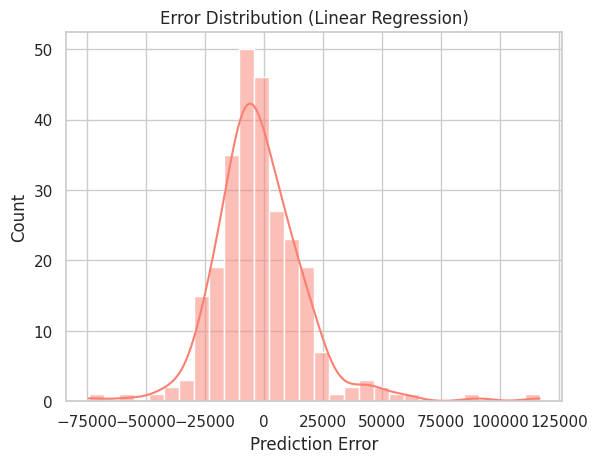

In [372]:
sns.histplot(y_test - predictions1, kde=True, color='salmon')
plt.title('Error Distribution (Linear Regression)')
plt.xlabel('Prediction Error')
plt.show()


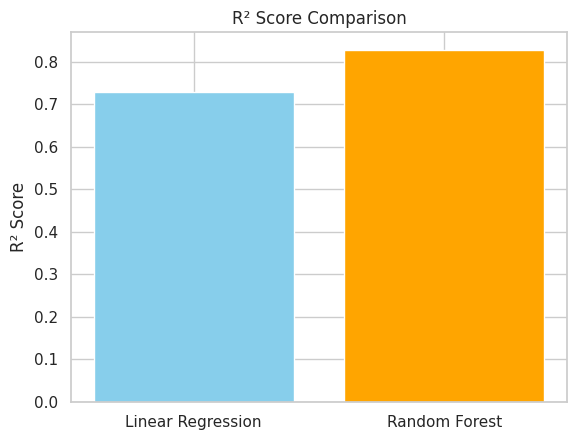

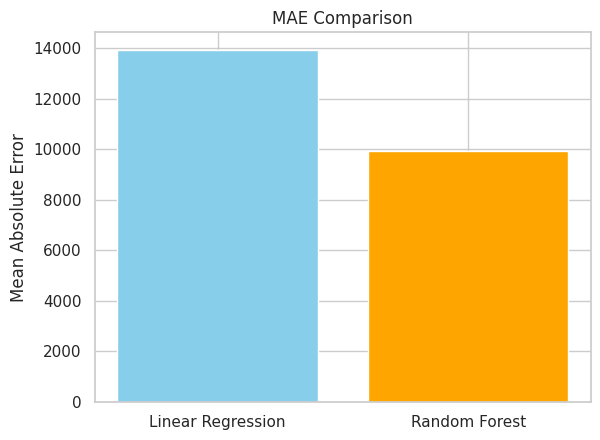

In [373]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest']
r2_scores = [r2_lr, r2_rf]
mae_scores = [mae_lr, mae_rf]

plt.bar(models, r2_scores, color=['skyblue', 'orange'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.show()

plt.bar(models, mae_scores, color=['skyblue', 'orange'])
plt.title('MAE Comparison')
plt.ylabel('Mean Absolute Error')
plt.show()


## (F) Conclusion
The Laptop price prediction is done by two different models, Linear Regression and Random Forest. The Random Forest Regressor gives the accuracy of 95% which is more that the accuracy of Linear Regression which is 92%.